A notebook for capturing calibration data for the cameras of the OROCHI Simualtor of the Kameda Lab.

Eigth round of experiments after setting bias to 4 DN.

# Process Overview

The objective of this notebook is to capture uniformly illuminated and dark images (across the sampling area) that can be used to characterise each camera of the OROCHI simulator, in terms of:
- Linearity
- Read Noise
- Gain
- FPN
- Dark Signal

To do this, we will  capture images of the 99% Reflectance Spectralon Calibration Target (SCT99) and the 5% Reflectance Spectral Calibration Target (SCT5), and images without illumination, at exposures that range from the minimum possible with the cameras (~5 µs) up to a maximum, defined such that all pixels of the image are saturated (DN=4094).

For each exposure, we will capture:
- 2 illuminated images of the target
- 25 dark images (to reduce read noise by factor of 5)

We will choose exposures with the following procedure:
1. Start at minimum exposure - capture pair, record exposure
2. Double exposure - capture pair, record exposure
3. Repeat until all pixels are saturated - i.e. all = 255
4. Reduce exposure by factor of 0.90, and repeat, until 0 pixels are saturated.

This process will be repeated for SCT99 and SCT5, and then again for dark images.
Then, 25 dark frames will be captured for each exposure, and the mean and standard deviation TIFF float images recorded.


# Camera Setup

Here we configure and setup the camera capture objects.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import orochi_sim_ctrl as osc

ic = osc.start_ic()
camera_config = osc.load_camera_config()
cameras = osc.connect_cameras(ic, camera_config)
osc.configure_cameras(cameras) # updated bias to 4 DN

Device 0 (DMK 33GX249 10910288) succesfully connected.
Device 1 (DMK 33GX249 10910273) succesfully connected.
Device 2 (DMK 33GX249 10910289) succesfully connected.
Device 3 (DMK 33GX249 10910294) succesfully connected.
Device 4 (DMK 33GX249 10910291) succesfully connected.
Device 5 (DMK 33GX249 10910295) succesfully connected.
Device 7 (DMK 33GX249 23120778) succesfully connected.
Device 6 (DMK 33GX249 10910265) succesfully connected.
-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
1
Video Format set to : Y16 (1920x1200)
1
Sink Format set to : "SinkFormats.Y16"
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Image size: 1920 x 1200 pixels
Image buffer size: 36864000 bytes
Bits per pixel: 2
Color Format: SinkFormats.Y16
Frame Rate: 33
Brightness current Value: 4
Contrast current Value: 0
Sharpness current Value: 0
Gamma current Value: 100
Gain current Value: 4.300000190734863
Gain current Auto: 0


In [3]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from time import sleep

Here we are only going to process images over the calibration target itself, so we restrict the ROI to a very small field of 28x28 pixels.
Statistics are therfore computed over 1024 pixels in each case.

-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 300.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Expected new quantile: 64.82166666666666 x 60.0 = 3889.2999999999993
Exposure set to 0.12964299321174622 (err of 3.4627931499997544e-07
Trial 1:
Imaging with Exposure: 0.12964299321174622 s
+Good exposure 0.12964299321174622 Image recieved
Quantile: 4094.0, Target: 3889.2999999999997
Exposure current Value: 0.12964299321174622
Expected new quantile: 0.18999999999999997 x 20470.0 = 3889.2999999999993
Exposure set to 0.02463199943304062 (err of 1.6927719116016648e-07
Trial 2:
Imaging with Exposure: 0.02463199943304062 s
+Good exposure 0.02463199943304062 Image recieved
Quantile: 3651.0, Target: 3889.2999999999997
Exposure current Value: 0.02463199943304062
Expected new qua

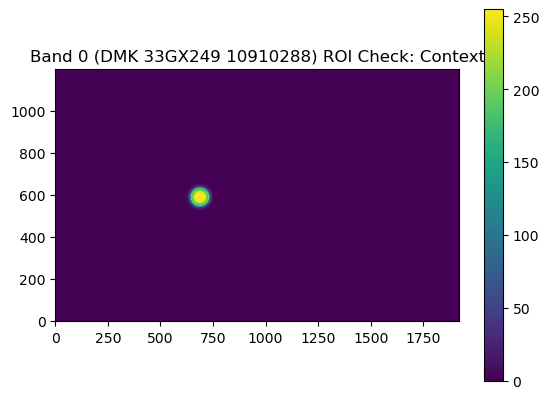

Imaging with Exposure: 0.026239000260829926 s
+Good exposure 0.026239000260829926 Image recieved


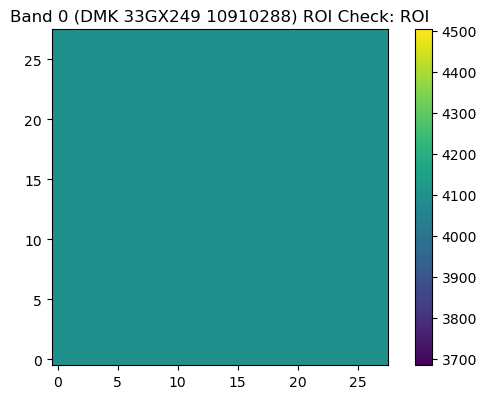

-----------------------------------
-----------------------------------
Device 1 (DMK 33GX249 10910273)
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 431.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Expected new quantile: 9.023897911832947 x 431.0 = 3889.3
Exposure set to 0.018046999350190163 (err of 7.973307000336272e-07
Trial 1:
Imaging with Exposure: 0.018046999350190163 s
+Good exposure 0.018046999350190163 Image recieved
Quantile: 3861.0, Target: 3889.2999999999997
Success after 1 trials
Exposure current Value: 0.018046999350190163
Imaging with Exposure: 0.018046999350190163 s
+Good exposure 0.018046999350190163 Image recieved
x: 256
y: 680


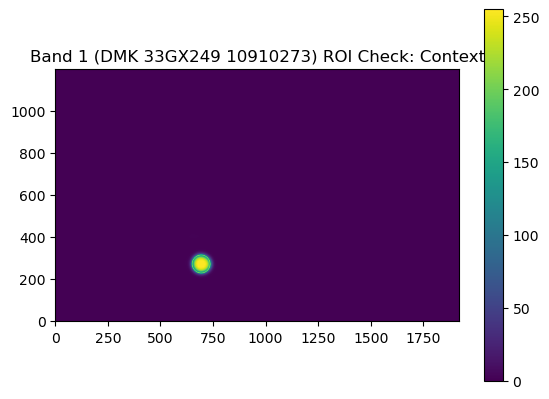

Imaging with Exposure: 0.018046999350190163 s
+Good exposure 0.018046999350190163 Image recieved


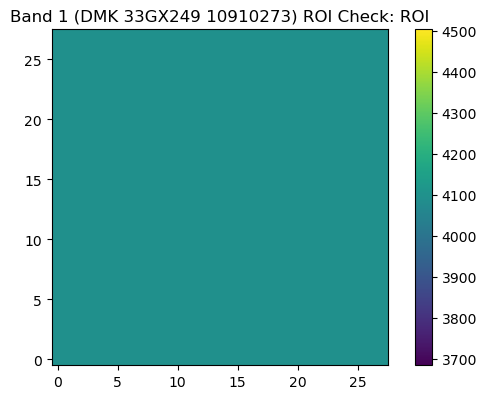

-----------------------------------
-----------------------------------
Device 2 (DMK 33GX249 10910289)
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 81.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Expected new quantile: 240.08024691358025 x 16.2 = 3889.2999999999997
Exposure set to 0.4801599979400635 (err of 5.186934967094103e-07
Trial 1:
Imaging with Exposure: 0.4801599979400635 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 0.4801599979400635 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Quantile: 4094.0, Target: 3889.2999999999997
Exposure current Value: 0.4801599979400635
Expected new quantile: 0.18999999999999997 x 20470.0 = 3889.2999999999993
Exposure set to 0.09122999757528305 (err of 4.020333290027933e-07
Trial 2:
Imagin

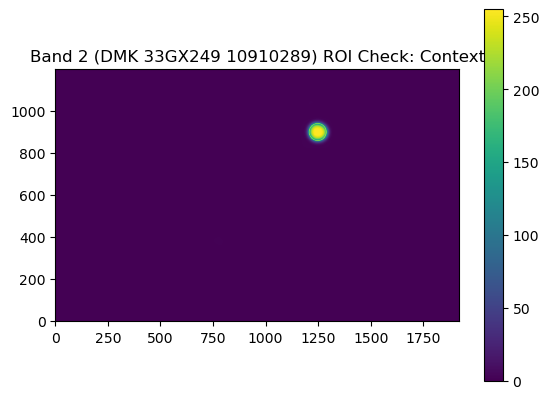

Imaging with Exposure: 0.1001179963350296 s
+Good exposure 0.1001179963350296 Image recieved


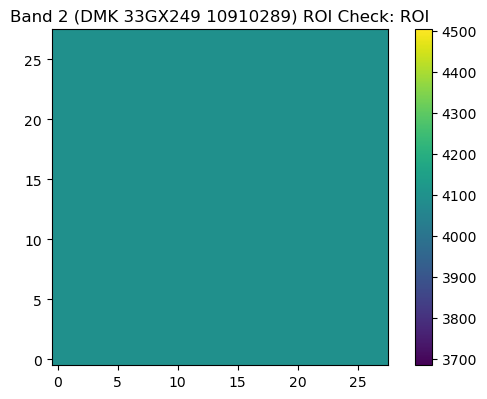

-----------------------------------
-----------------------------------
Device 3 (DMK 33GX249 10910294)
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1611.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Expected new quantile: 2.4142147734326502 x 1611.0 = 3889.2999999999997
Exposure set to 0.004827999975532293 (err of 4.298006711046451e-07
Trial 1:
Imaging with Exposure: 0.004827999975532293 s
+Good exposure 0.004827999975532293 Image recieved
Quantile: 3865.0, Target: 3889.2999999999997
Success after 1 trials
Exposure current Value: 0.004827999975532293
Imaging with Exposure: 0.004827999975532293 s
+Good exposure 0.004827999975532293 Image recieved
x: 266
y: 972


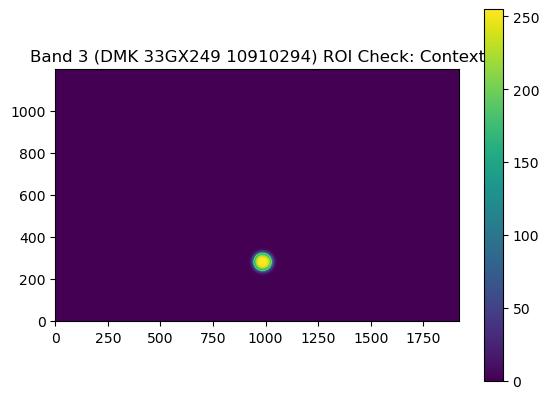

Imaging with Exposure: 0.004827999975532293 s
+Good exposure 0.004827999975532293 Image recieved


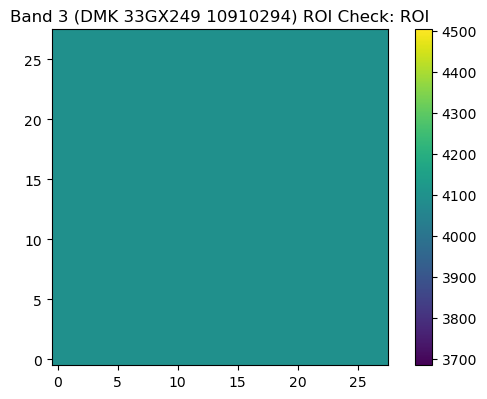

-----------------------------------
-----------------------------------
Device 4 (DMK 33GX249 10910291)
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 3006.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Expected new quantile: 1.2938456420492348 x 3006.0 = 3889.2999999999997
Exposure set to 0.0025869999080896378 (err of 6.914989175727665e-07
Trial 1:
Imaging with Exposure: 0.0025869999080896378 s
+Good exposure 0.0025869999080896378 Image recieved
Quantile: 3879.0, Target: 3889.2999999999997
Success after 1 trials
Exposure current Value: 0.0025869999080896378
Imaging with Exposure: 0.0025869999080896378 s
+Good exposure 0.0025869999080896378 Image recieved
x: 588
y: 1222


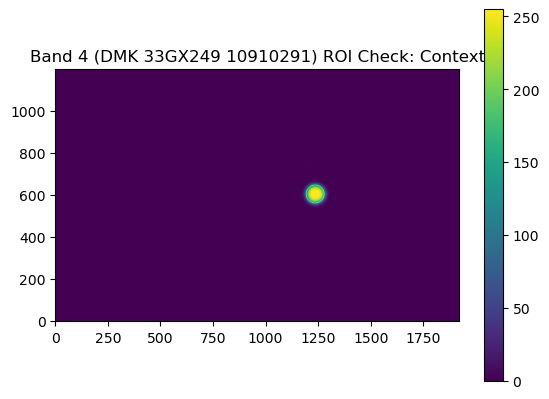

Imaging with Exposure: 0.0025869999080896378 s
+Good exposure 0.0025869999080896378 Image recieved


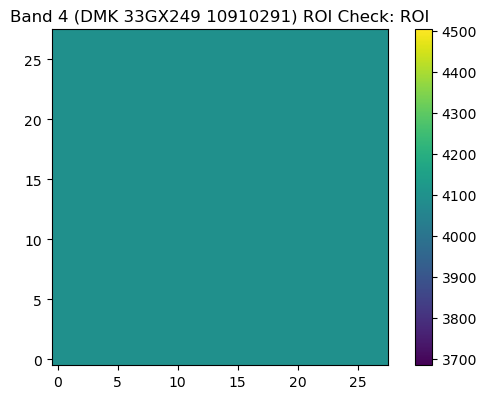

-----------------------------------
-----------------------------------
Device 5 (DMK 33GX249 10910295)
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 62.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Expected new quantile: 313.6532258064516 x 12.4 = 3889.2999999999997
Exposure set to 0.6273059844970703 (err of 4.969112904484874e-07
Trial 1:
Imaging with Exposure: 0.6273059844970703 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 0.6273059844970703 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Quantile: 4094.0, Target: 3889.2999999999997
Exposure current Value: 0.6273059844970703
Expected new quantile: 0.18999999999999997 x 20470.0 = 3889.2999999999993
Exposure set to 0.11918800324201584 (err of 1.3381242749965772e-07
Trial 2:
Imagin

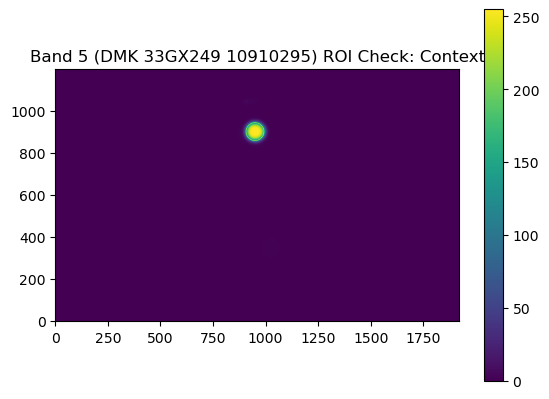

Imaging with Exposure: 0.13312900066375732 s
+Good exposure 0.13312900066375732 Image recieved


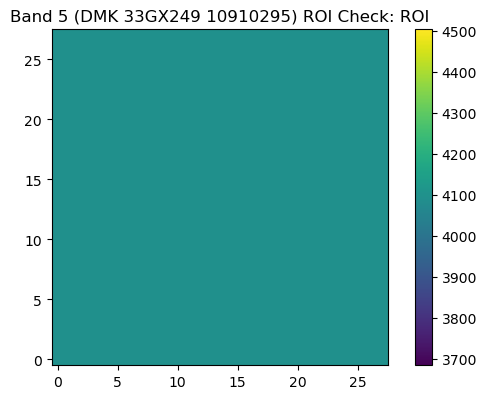

-----------------------------------
-----------------------------------
Device 7 (DMK 33GX249 23120778)
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1477.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Expected new quantile: 2.633243060257278 x 1477.0 = 3889.2999999999997
Exposure set to 0.005266000051051378 (err of 4.863196078463278e-07
Trial 1:
Imaging with Exposure: 0.005266000051051378 s
+Good exposure 0.005266000051051378 Image recieved
Quantile: 3856.0, Target: 3889.2999999999997
Success after 1 trials
Exposure current Value: 0.005266000051051378
Imaging with Exposure: 0.005266000051051378 s
+Good exposure 0.005266000051051378 Image recieved
x: 872
y: 624


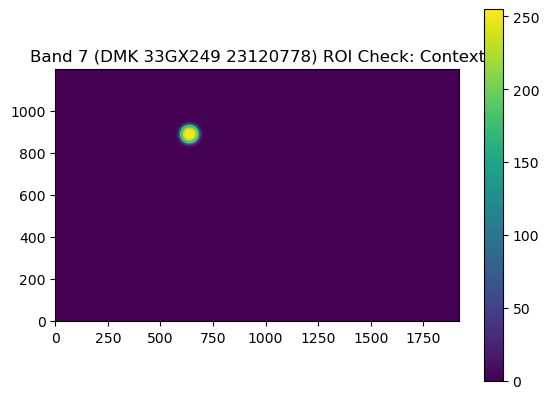

Imaging with Exposure: 0.005266000051051378 s
+Good exposure 0.005266000051051378 Image recieved


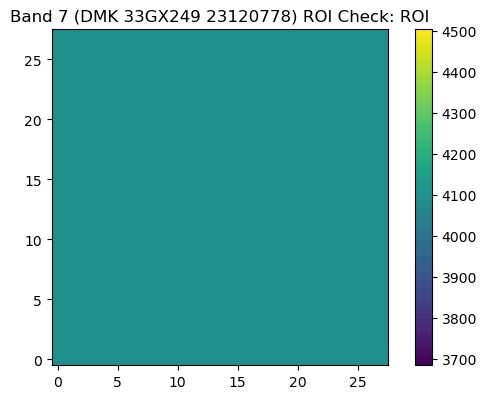

-----------------------------------
-----------------------------------
Device 6 (DMK 33GX249 10910265)
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 805.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Expected new quantile: 4.831428571428571 x 805.0 = 3889.2999999999997
Exposure set to 0.009662000462412834 (err of 8.571394053951548e-07
Trial 1:
Imaging with Exposure: 0.009662000462412834 s
+Good exposure 0.009662000462412834 Image recieved
Quantile: 3840.0, Target: 3889.2999999999997
Success after 1 trials
Exposure current Value: 0.009662000462412834
Imaging with Exposure: 0.009662000462412834 s
+Good exposure 0.009662000462412834 Image recieved
x: 248
y: 1240


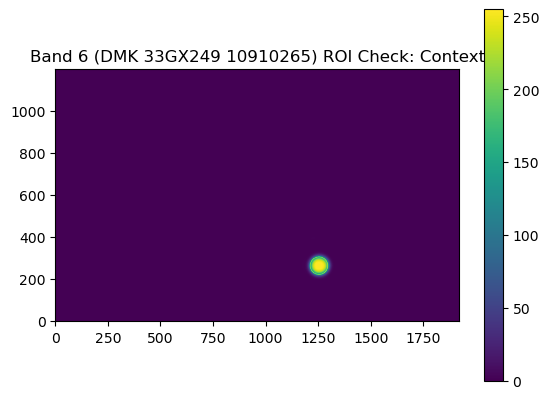

Imaging with Exposure: 0.009662000462412834 s
+Good exposure 0.009662000462412834 Image recieved


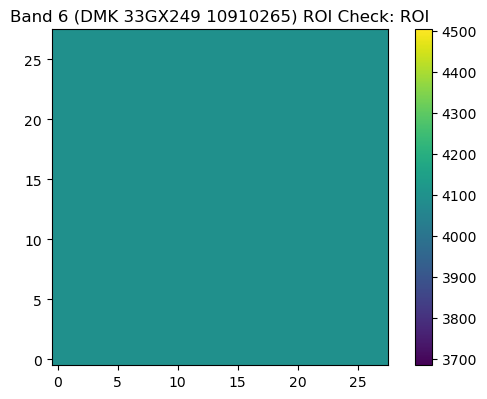

-----------------------------------


In [4]:
osc.find_camera_rois(cameras, roi_size=28)

-----------------------------------
Device 0
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 517.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 6.3350096711798844 x 517.0 = 3275.2000000000003
Exposure set to 0.012670000083744526 (err of 1.9860408869559754e-08
Trial 1:
Imaging with Exposure: 0.012670000083744526 s
+Good exposure 0.012670000083744526 Image recieved
Quantile: 3176.0, Target: 3275.2000000000003
Exposure current Value: 0.012670000083744526
Expected new quantile: 1.0312342569269521 x 3176.0 = 3275.2
Exposure set to 0.01306500006467104 (err of 7.38056953667604e-07
Trial 2:
Imaging with Exposure: 0.01306500006467104 s
+Good exposure 0.01306500006467104 Image recieved
Quantile: 3281.0, Target: 3275.2000000000003
Exposure current Value: 0.01306500006467104
Expected new quantile: 0.9982322462663823 x 3281.

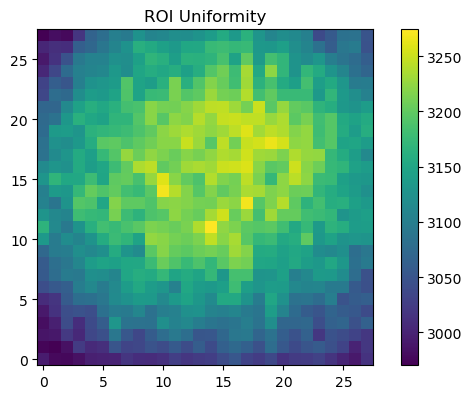

ROI Uniformity: 2.1400410843822417 %
-----------------------------------
-----------------------------------
Device 1
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 823.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 3.979586877278251 x 823.0 = 3275.2000000000003
Exposure set to 0.007958999834954739 (err of 1.7429764223066135e-07
Trial 1:
Imaging with Exposure: 0.007958999834954739 s
+Good exposure 0.007958999834954739 Image recieved
Quantile: 3231.0, Target: 3275.2000000000003
Exposure current Value: 0.007958999834954739
Expected new quantile: 1.013679975239864 x 3231.0 = 3275.2000000000003
Exposure set to 0.008066999725997448 (err of 8.790296335530606e-07
Trial 2:
Imaging with Exposure: 0.008066999725997448 s
+Good exposure 0.008066999725997448 Image recieved
Quantile: 3282.0, Target: 3275.2000000000003
Exposu

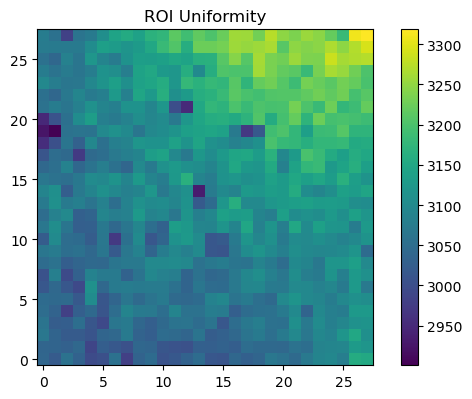

ROI Uniformity: 2.0897013145660117 %
-----------------------------------
-----------------------------------
Device 2
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 186.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 88.04301075268818 x 37.2 = 3275.2000000000003
Exposure set to 0.17608599364757538 (err of 3.6221438209915746e-08
Trial 1:
Imaging with Exposure: 0.17608599364757538 s
+Good exposure 0.17608599364757538 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.17608599364757538
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.028172999620437622 (err of 7.593631744379215e-07
Trial 2:
Imaging with Exposure: 0.028172999620437622 s
+Good exposure 0.028172999620437622 Image recieved
Quantile: 2501.0, Target: 3275.2000000000003
Exposure current Value:

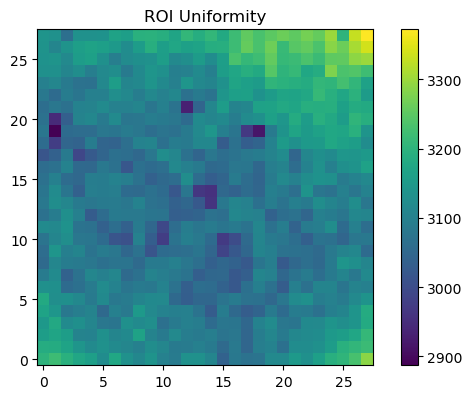

ROI Uniformity: 1.8995519424050618 %
-----------------------------------
-----------------------------------
Device 3
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 2668.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 1.2275862068965517 x 2668.0 = 3275.2
Exposure set to 0.002455000067129731 (err of 1.7246327780424606e-07
Trial 1:
Imaging with Exposure: 0.002455000067129731 s
+Good exposure 0.002455000067129731 Image recieved
Quantile: 3279.0, Target: 3275.2000000000003
Exposure current Value: 0.002455000067129731
Expected new quantile: 0.9988411100945411 x 3279.0 = 3275.2000000000003
Exposure set to 0.002452000044286251 (err of 1.549480477826791e-07
Trial 2:
Imaging with Exposure: 0.002452000044286251 s
+Good exposure 0.002452000044286251 Image recieved
Quantile: 3266.0, Target: 3275.2000000000003
Exposure curre

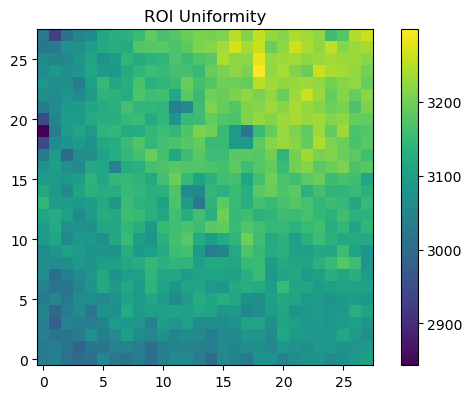

ROI Uniformity: 1.9494693726669658 %
-----------------------------------
-----------------------------------
Device 4
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.00031999999191612005 (err of 2.3283064387071006e-11
Trial 1:
Imaging with Exposure: 0.00031999999191612005 s
+Good exposure 0.00031999999191612005 Image recieved
Quantile: 708.0, Target: 3275.2000000000003
Exposure current Value: 0.00031999999191612005
Expected new quantile: 4.625988700564972 x 708.0 = 3275.2
Exposure set to 0.0014799999771639705 (err of 3.163696208831508e-07
Trial 2:
Imaging with Exposure: 0.0014799999771639705 s
+Good exposure 0.0014799999771639705 Image recieved
Quantile: 3249.0, Target: 3275.2000000000003
Exposure current Va

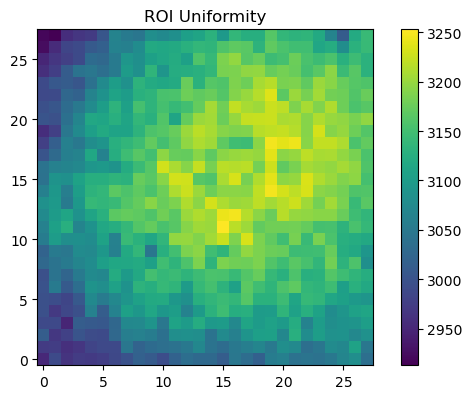

ROI Uniformity: 2.2244479664759895 %
-----------------------------------
-----------------------------------
Device 5
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 106.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 154.49056603773587 x 21.2 = 3275.2000000000003
Exposure set to 0.3089810013771057 (err of 1.4537418230320398e-07
Trial 1:
Imaging with Exposure: 0.3089810013771057 s
+Good exposure 0.3089810013771057 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.3089810013771057
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.04943599924445152 (err of 9.60975885394566e-07
Trial 2:
Imaging with Exposure: 0.04943599924445152 s
+Good exposure 0.04943599924445152 Image recieved
Quantile: 2381.0, Target: 3275.2000000000003
Exposure current Value: 0.0494

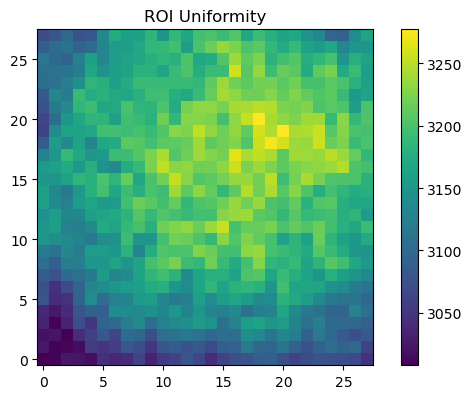

ROI Uniformity: 1.723360064301797 %
-----------------------------------
-----------------------------------
Device 7
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 2504.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 1.3079872204472844 x 2504.0 = 3275.2000000000003
Exposure set to 0.0026149998884648085 (err of 9.746766818788735e-07
Trial 1:
Imaging with Exposure: 0.0026149998884648085 s
+Good exposure 0.0026149998884648085 Image recieved
Quantile: 3247.0, Target: 3275.2000000000003
Exposure current Value: 0.0026149998884648085
Expected new quantile: 1.0086849399445643 x 3247.0 = 3275.2000000000003
Exposure set to 0.0026370000559836626 (err of 7.109494675051724e-07
Trial 2:
Imaging with Exposure: 0.0026370000559836626 s
+Good exposure 0.0026370000559836626 Image recieved
Quantile: 3295.0, Target: 3275.20000000000

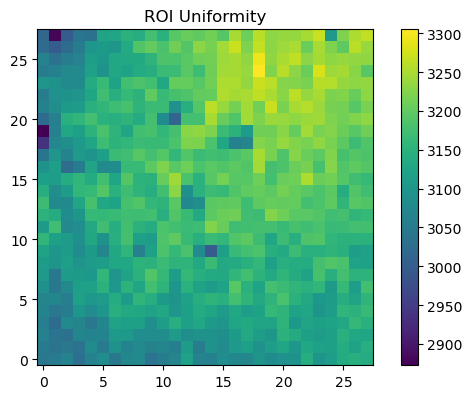

ROI Uniformity: 1.8662264785391145 %
-----------------------------------
-----------------------------------
Device 6
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1312.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 2.4963414634146344 x 1312.0 = 3275.2000000000003
Exposure set to 0.004991999827325344 (err of 6.83336643638767e-07
Trial 1:
Imaging with Exposure: 0.004991999827325344 s
+Good exposure 0.004991999827325344 Image recieved
Quantile: 3227.0, Target: 3275.2000000000003
Exposure current Value: 0.004991999827325344
Expected new quantile: 1.0149364735048032 x 3227.0 = 3275.2
Exposure set to 0.005065999925136566 (err of 5.627753456053861e-07
Trial 2:
Imaging with Exposure: 0.005065999925136566 s
+Good exposure 0.005065999925136566 Image recieved
Quantile: 3272.0, Target: 3275.2000000000003
Exposure current

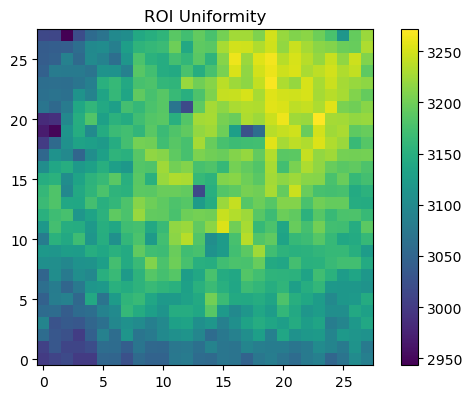

ROI Uniformity: 1.926243762789215 %
-----------------------------------


In [5]:
osc.check_channel_roi_uniformity(cameras)

# Calibration Functions

Here we define simple functions for controlling the cameras during the calibration routines.

In [7]:
def camera_calibration_sequence(camera, subject) -> pd.DataFrame:
    """Capture pairs of images with increasing exposure time until all
    pixels are saturated, then decrease exposure time until no pixels are 
    saturated.
    
    Args:
        camera: Camera object to capture images from.
    
    Returns:
        DataFrame with columns:
            - exposure
            - mean
            - std
    """
    camera.set_property('Exposure', 'Auto', 0, 'Switch')        
    t_min = 1.0/16666 # (seconds) verify that this is the minimum exposure time
    t_max = 50.0
    t_exp = t_min
    up_scale = 1.2
    dwn_scale = 0.99
    t_scale = up_scale
    img_type='calibration'
    stop = False    
    cmd_exposures = []
    exposures = []
    means = []
    stds = []
    shots = []
    sat_val = camera.max_dn
    while stop is False:
        print(f'Exposure: {t_exp:.7f} s')
        camera.set_property('Exposure', 'Value', t_exp, 'AbsoluteValue')
        img_1 = camera.image_capture(roi=True)
        # sleep(0.5)
        img_2 = camera.image_capture(roi=True)
        # sleep(0.5)
        name_1 = f'{t_exp*1E6:.0f}us_1'
        name_2 = f'{t_exp*1E6:.0f}us_2'
        camera.save_image(name_1, subject, img_type, img_1)
        camera.save_image(name_2, subject, img_type, img_2)
        exposures.append(camera.get_exposure_value())
        cmd_exposures.append(t_exp)
        mean = np.mean([np.mean(img_1), np.mean(img_2)])
        std = np.mean([np.std(img_1), np.std(img_2)])
        shot = np.sqrt(np.mean((img_1 - img_2)**2)/2)
        means.append(mean)
        stds.append(std)
        shots.append(shot)
        if mean >= sat_val * 0.999:
            t_scale = dwn_scale
        if t_scale == dwn_scale:
            # n_sat = (np.sum(img_1 == sat_val) + np.sum(img_2 == sat_val)) / 2
            if mean <= sat_val * 0.80:
                stop = True
        else:
            if t_exp*t_scale > t_max:
                t_scale = dwn_scale
        t_exp = t_exp * t_scale

    results = pd.DataFrame({'exposure': exposures, 'raw mean': means, 'raw standard deviation': stds, 'shot and read noise': shots, 'cmd exposure': cmd_exposures})
    results.sort_values('exposure', inplace=True)

    print(results)

    cwl_str = str(int(camera.camera_props['cwl']))
    channel = str(camera.camera_props['number'])+'_'+cwl_str
    subject_dir = Path('..', 'data', subject, channel)
    subject_dir.mkdir(parents=True, exist_ok=True)
    filename = 'exposures.csv'
    img_file =str(Path(subject_dir, filename).with_suffix('.tif'))

    results['exposure'].to_csv(f'{subject}_exposures.csv', index=False)

    fig, ax = plt.subplots(2,1, figsize=(5,10))
    ax[0].plot(results['exposure'], results['raw mean'], label='Ret.')
    ax[0].plot(results['cmd exposure'], results['raw mean'], label='Cmd.')
    ax[0].set_xlabel('Exposure (s)')
    ax[0].set_ylabel('Mean Pixel Value')
    results.sort_values('raw mean', inplace=True)
    ax[1].loglog(results['raw mean'], results['raw standard deviation'], label='Total Noise')
    ax[1].loglog(results['raw mean'], results['shot and read noise'], label='Shot and Read Noise')
    ax[1].set_xlabel('Mean Pixel Value')
    ax[1].set_ylabel('Standard Deviation')
    plt.show()
    return cmd_exposures

# SCT99 Procedure

Output:
- SCT99 Exposure List
- SCT99 Lit Image Directory

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_040723\0_850\850_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_040723\0_850\850_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_040723\0_850\850_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99_040723\0_850\850_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-

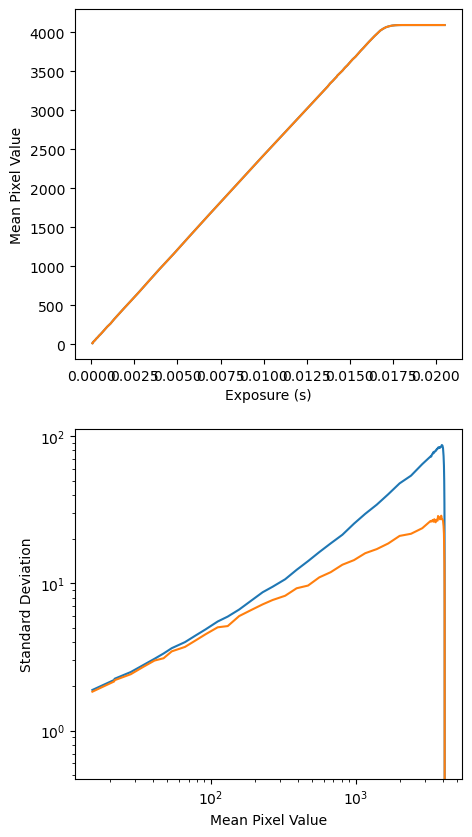

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_040723\1_475\475_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_040723\1_475\475_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_040723\1_475\475_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99_040723\1_475\475_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-

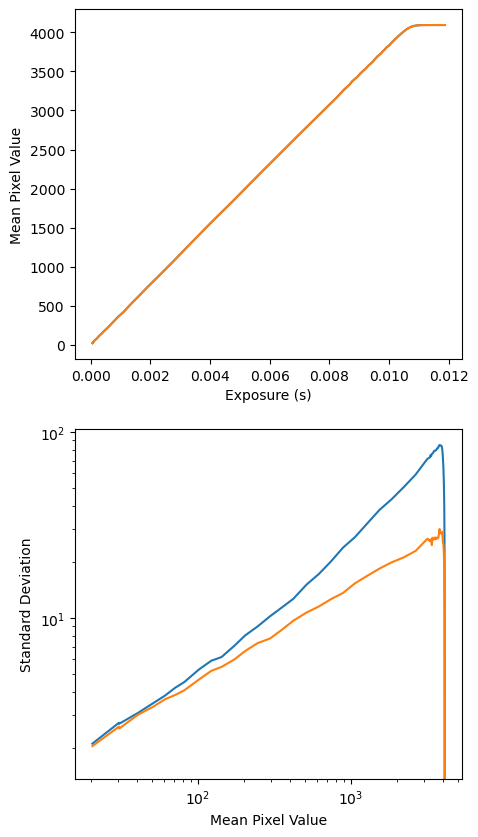

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_040723\2_400\400_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_040723\2_400\400_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_040723\2_400\400_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99_040723\2_400\400_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-

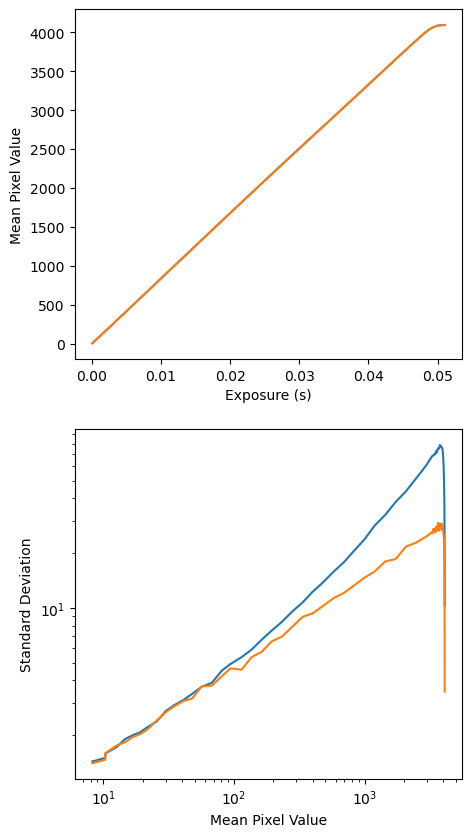

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_040723\3_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_040723\3_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_040723\3_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99_040723\3_550\550_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-

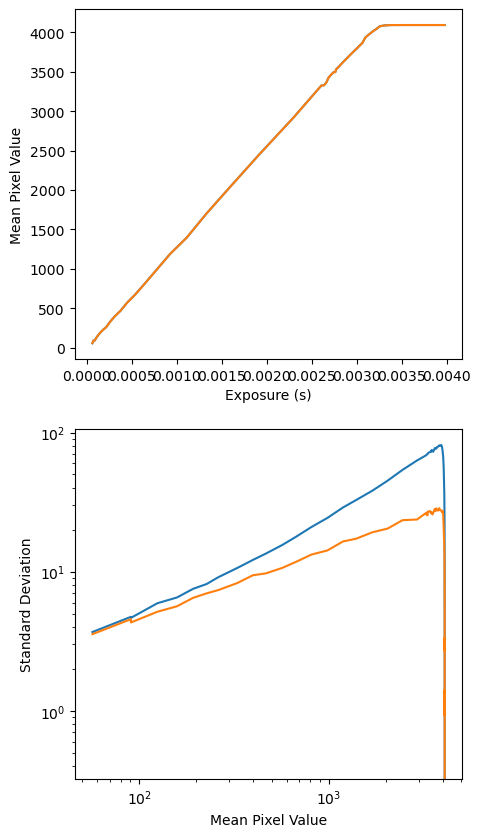

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_040723\4_725\725_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_040723\4_725\725_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_040723\4_725\725_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99_040723\4_725\725_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-

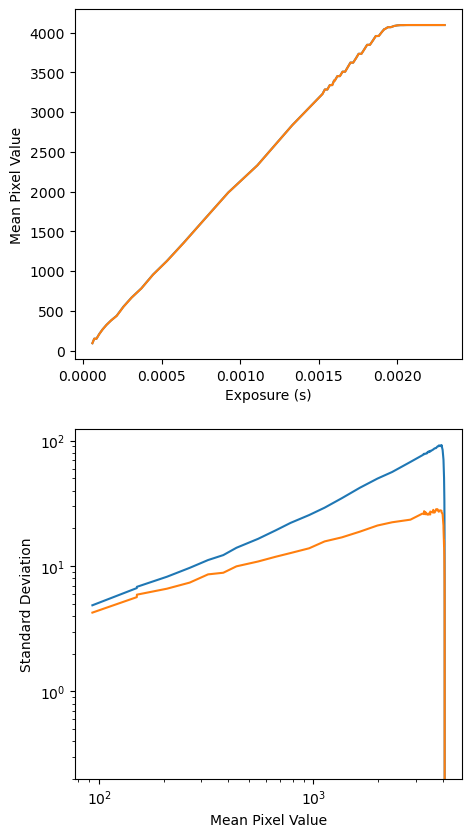

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_040723\5_950\950_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_040723\5_950\950_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_040723\5_950\950_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99_040723\5_950\950_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-

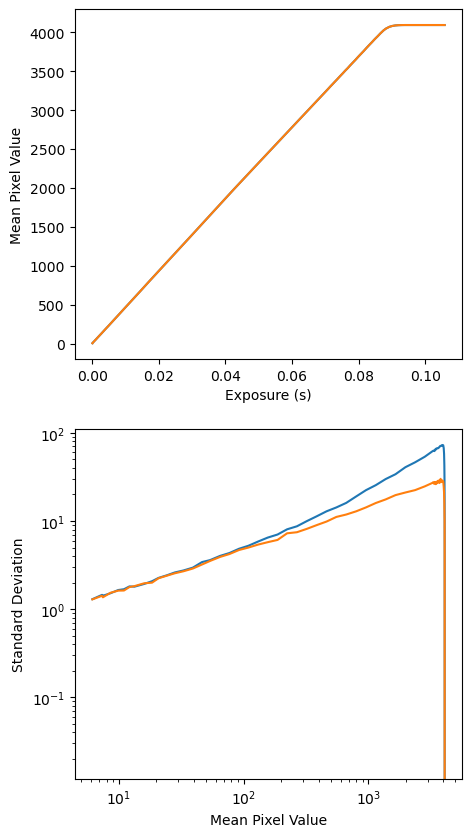

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_040723\7_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_040723\7_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_040723\7_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99_040723\7_550\550_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-

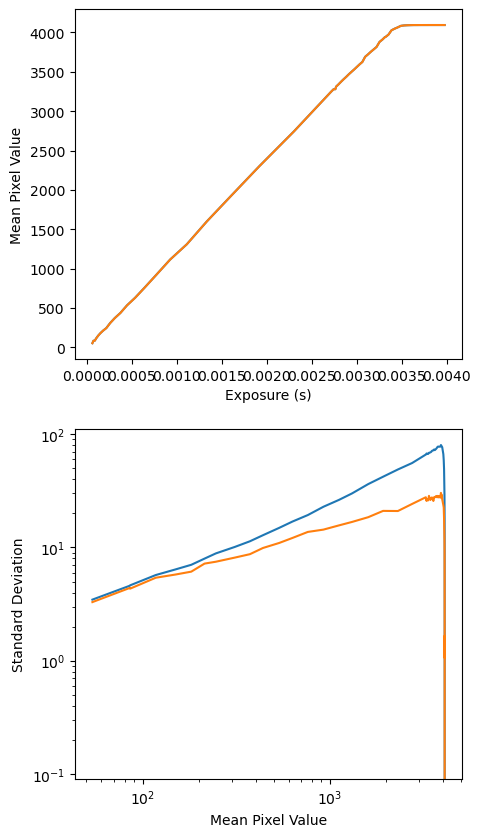

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_040723\6_650\650_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_040723\6_650\650_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_040723\6_650\650_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99_040723\6_650\650_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-

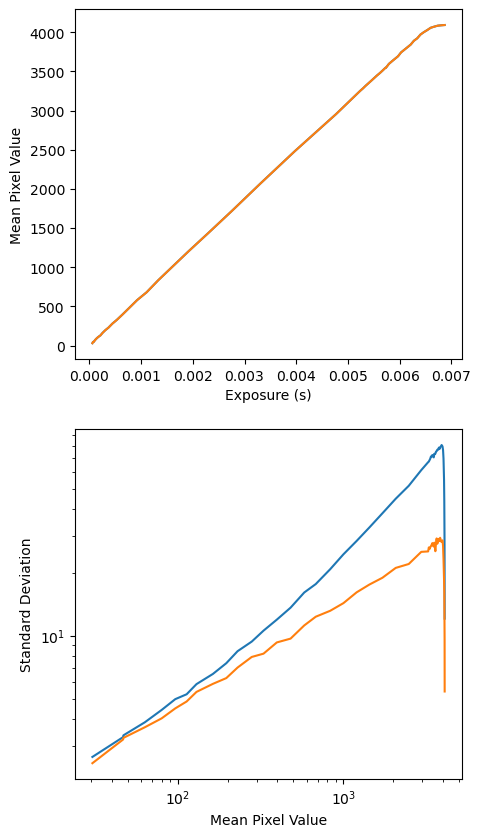

In [8]:
sct99_exposures = {}
for camera in cameras:
    sct99_exposures[camera] = camera_calibration_sequence(camera, 'SCT99_040723')

# SCT5 Procedure

Output:
- SCT5 Exposure List
- SCT5 Lit Image Directory

-----------------------------------
Device 0
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 40.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 409.40000000000003 x 8.0 = 3275.2000000000003
Exposure set to 0.8187999725341797 (err of 6.635673355237515e-08
Trial 1:
Imaging with Exposure: 0.8187999725341797 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 0.8187999725341797 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.8187999725341797
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.13100700080394745 (err of 9.948015212979389e-07
Trial 2:
Imaging with Exposure: 0.13100700080394745 s
+Good exposure 0.13100700080394745 I

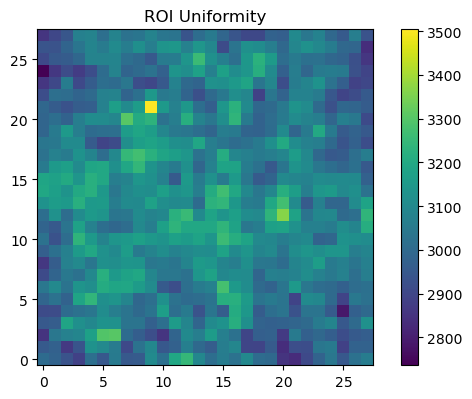

ROI Uniformity: 2.9987480522332834 %
-----------------------------------
-----------------------------------
Device 1
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 50.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 327.52000000000004 x 10.0 = 3275.2000000000003
Exposure set to 0.6550400257110596 (err of 5.401670999383157e-09
Trial 1:
Imaging with Exposure: 0.6550400257110596 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 0.6550400257110596 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.6550400257110596
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.10480599850416183 (err of 4.056096076926474e-07
Trial 2:
Imaging

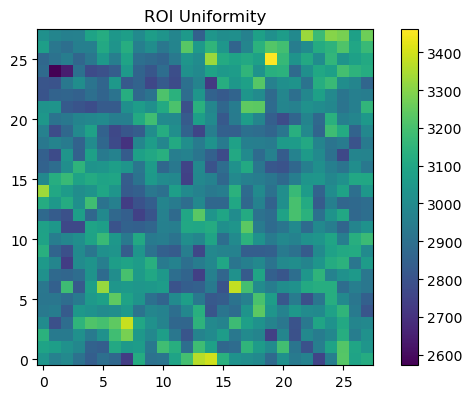

ROI Uniformity: 4.0663234170079345 %
-----------------------------------
-----------------------------------
Device 2
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 17.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 963.2941176470589 x 3.4 = 3275.2000000000003
Exposure set to 1.9265880584716797 (err of 2.6833046895546886e-07
Trial 1:
Imaging with Exposure: 1.9265880584716797 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 1.9265880584716797 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 1.9265880584716797
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.3082540035247803 (err of 8.58306885009874e-08
Trial 2:
Imaging wi

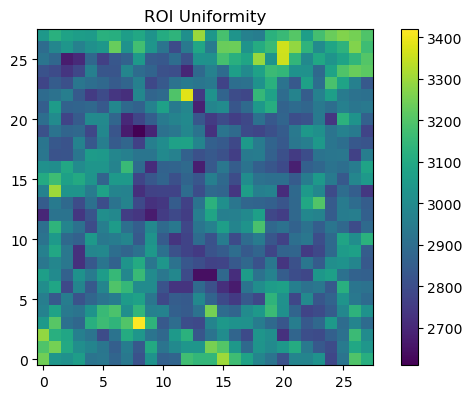

ROI Uniformity: 4.474196534857026 %
-----------------------------------
-----------------------------------
Device 3
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 148.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 110.64864864864865 x 29.6 = 3275.2000000000003
Exposure set to 0.2212969958782196 (err of 3.1193013527719415e-07
Trial 1:
Imaging with Exposure: 0.2212969958782196 s
+Good exposure 0.2212969958782196 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.2212969958782196
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.03540699928998947 (err of 5.200505256638954e-07
Trial 2:
Imaging with Exposure: 0.03540699928998947 s
+Good exposure 0.03540699928998947 Image recieved
Quantile: 2501.0, Target: 3275.2000000000003
Exposure current Value: 0.0354

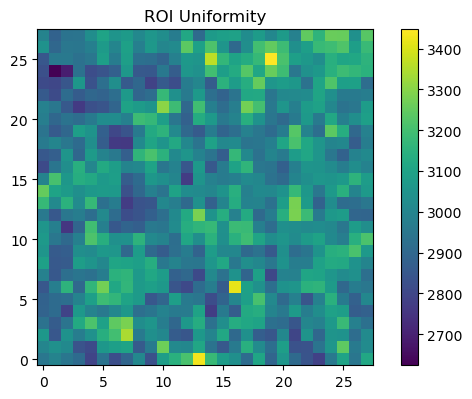

ROI Uniformity: 3.7876661574649044 %
-----------------------------------
-----------------------------------
Device 4
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 262.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 62.50381679389314 x 52.4 = 3275.2000000000003
Exposure set to 0.1250070035457611 (err of 6.359795691468495e-07
Trial 1:
Imaging with Exposure: 0.1250070035457611 s
+Good exposure 0.1250070035457611 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.1250070035457611
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.0200009997934103 (err of 1.207739114758577e-07
Trial 2:
Imaging with Exposure: 0.0200009997934103 s
+Good exposure 0.0200009997934103 Image recieved
Quantile: 2554.0, Target: 3275.2000000000003
Exposure current Value: 0.02000099

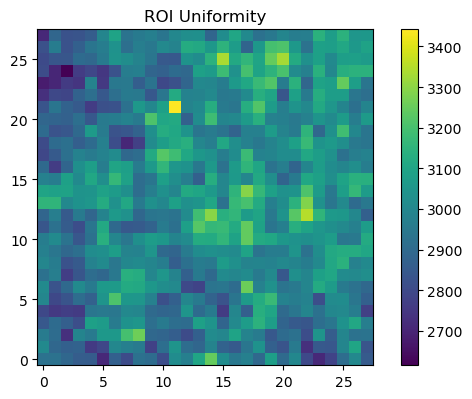

ROI Uniformity: 3.8023327808765384 %
-----------------------------------
-----------------------------------
Device 5
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 13.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 1259.6923076923078 x 2.6 = 3275.2000000000007
Exposure set to 2.5193839073181152 (err of 8.27730848751429e-07
Trial 1:
Imaging with Exposure: 2.5193839073181152 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 2.5193839073181152 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 2.5193839073181152
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.40310099720954895 (err of 4.279613494695411e-07
Trial 2:
Imaging w

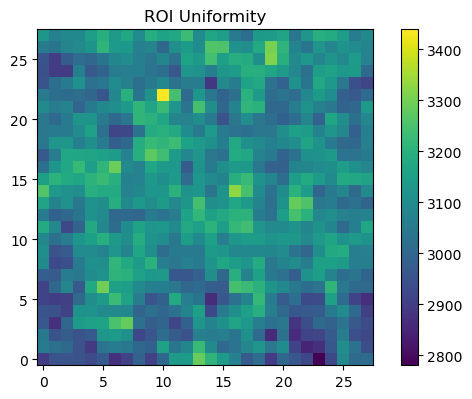

ROI Uniformity: 2.807322710032573 %
-----------------------------------
-----------------------------------
Device 7
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 139.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 117.81294964028778 x 27.8 = 3275.2000000000003
Exposure set to 0.2356249988079071 (err of 9.116642981366052e-07
Trial 1:
Imaging with Exposure: 0.2356249988079071 s
+Good exposure 0.2356249988079071 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.2356249988079071
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.037700001150369644 (err of -1.341104505225843e-09
Trial 2:
Imaging with Exposure: 0.037700001150369644 s
+Good exposure 0.037700001150369644 Image recieved
Quantile: 2506.0, Target: 3275.2000000000003
Exposure current Value: 0.0

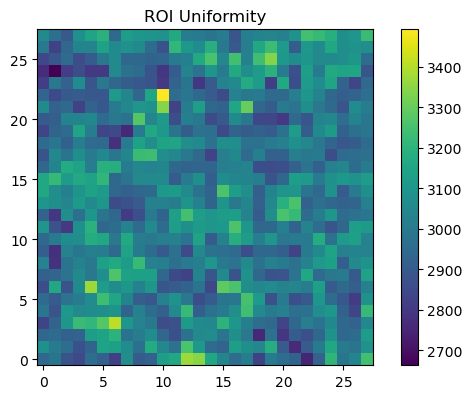

ROI Uniformity: 3.6726102717809552 %
-----------------------------------
-----------------------------------
Device 6
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 82.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 199.70731707317077 x 16.4 = 3275.2000000000003
Exposure set to 0.3994140028953552 (err of 6.502221634452354e-07
Trial 1:
Imaging with Exposure: 0.3994140028953552 s
+Good exposure 0.3994140028953552 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.3994140028953552
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.0639059990644455 (err of 2.413988113431076e-07
Trial 2:
Imaging with Exposure: 0.0639059990644455 s
+Good exposure 0.0639059990644455 Image recieved
Quantile: 2340.0, Target: 3275.2000000000003
Exposure current Value: 0.06390599

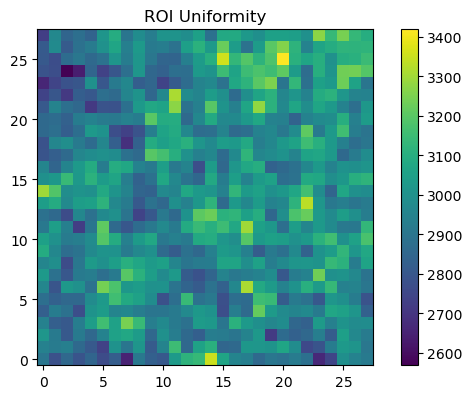

ROI Uniformity: 4.01327254271676 %
-----------------------------------


In [9]:
osc.check_channel_roi_uniformity(cameras)

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5_040723\0_850\850_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5_040723\0_850\850_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5_040723\0_850\850_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5_040723\0_850\850_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

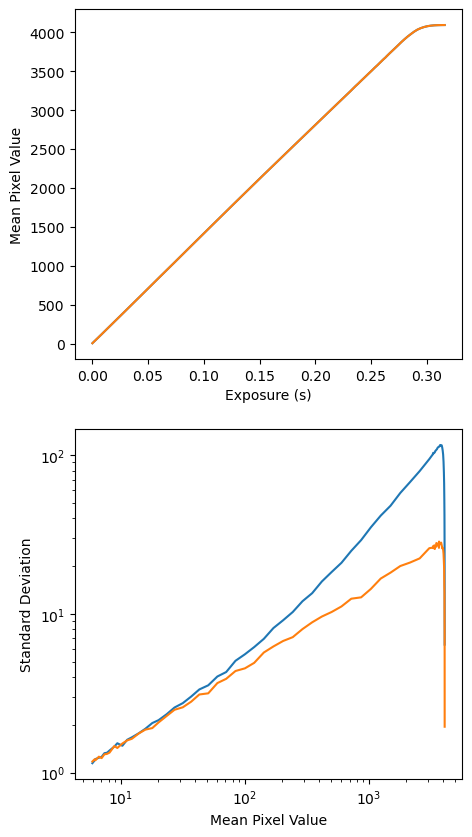

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5_040723\1_475\475_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5_040723\1_475\475_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5_040723\1_475\475_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5_040723\1_475\475_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

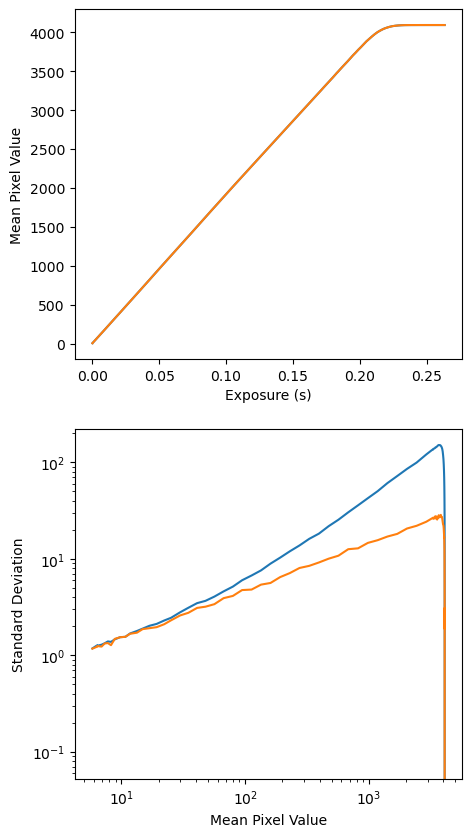

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5_040723\2_400\400_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5_040723\2_400\400_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5_040723\2_400\400_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5_040723\2_400\400_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

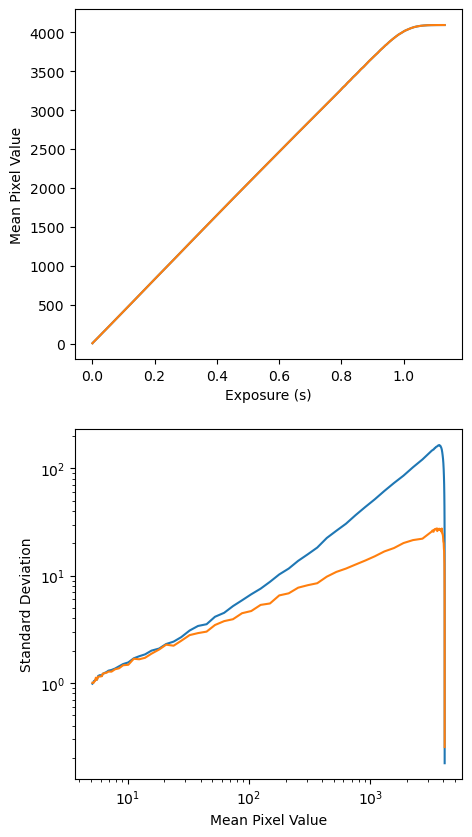

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5_040723\3_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5_040723\3_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5_040723\3_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5_040723\3_550\550_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

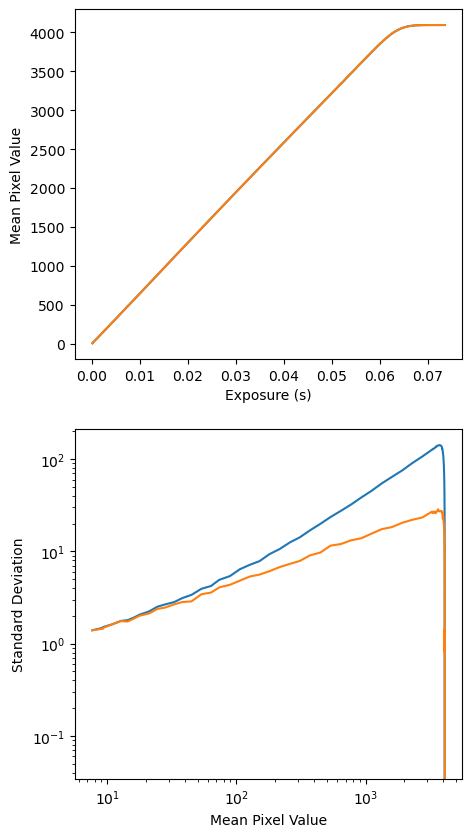

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5_040723\4_725\725_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5_040723\4_725\725_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5_040723\4_725\725_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5_040723\4_725\725_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

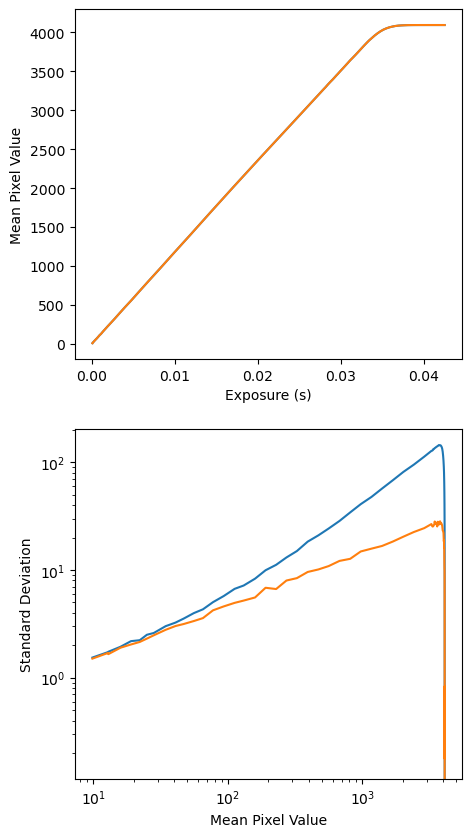

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5_040723\5_950\950_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5_040723\5_950\950_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5_040723\5_950\950_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5_040723\5_950\950_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

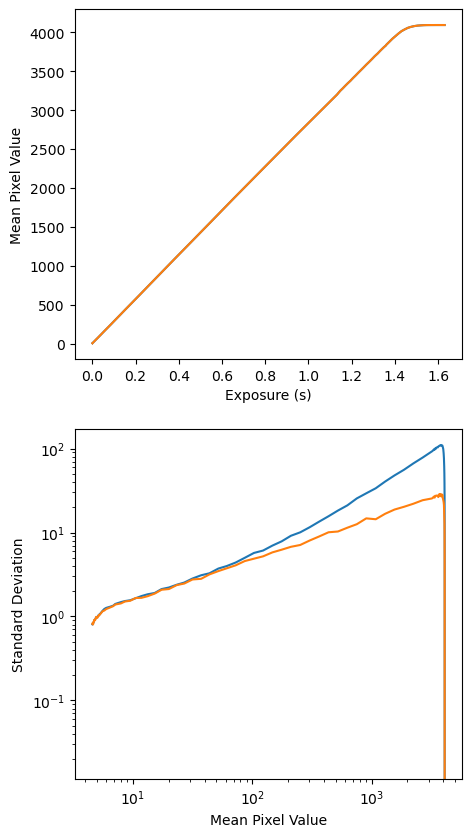

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5_040723\7_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5_040723\7_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5_040723\7_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5_040723\7_550\550_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

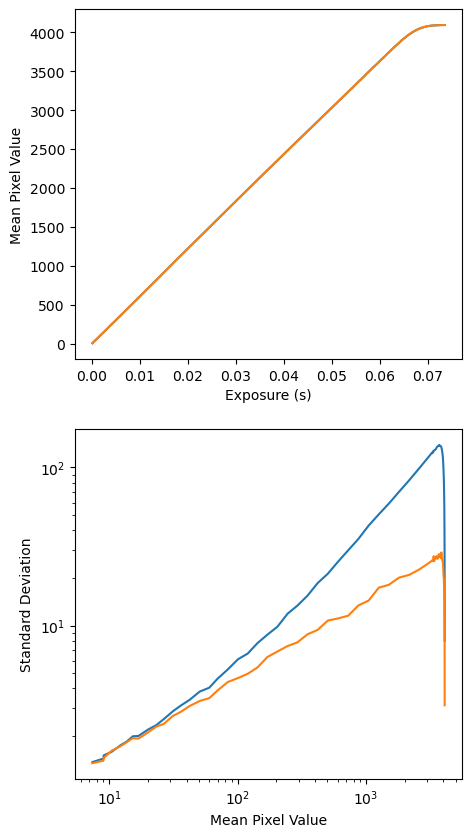

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5_040723\6_650\650_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5_040723\6_650\650_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5_040723\6_650\650_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5_040723\6_650\650_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

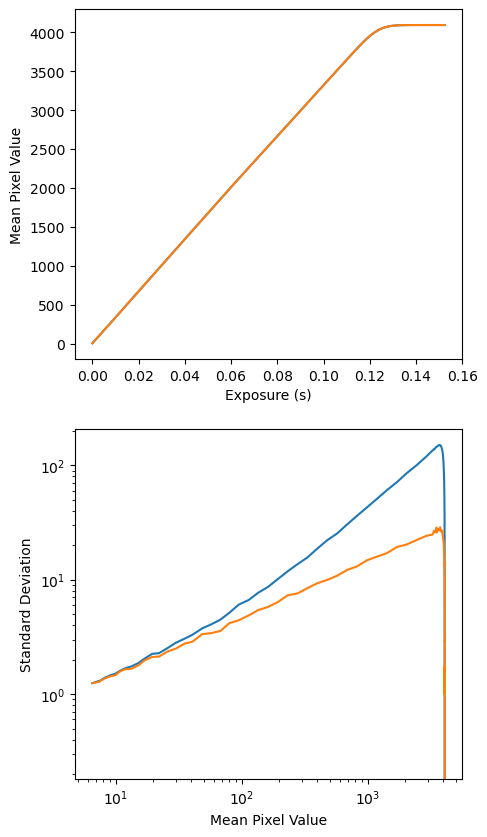

In [10]:
sct5_exposures = {}
for camera in cameras:
    sct5_exposures[camera] = camera_calibration_sequence(camera, 'SCT5_040723')

# Dark Signal Procedure

Output:
- Dark Exposure List
- Dark Image Directory

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_040723\0_850\850_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_040723\0_850\850_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_040723\0_850\850_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\dark_040723\0_850\850_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

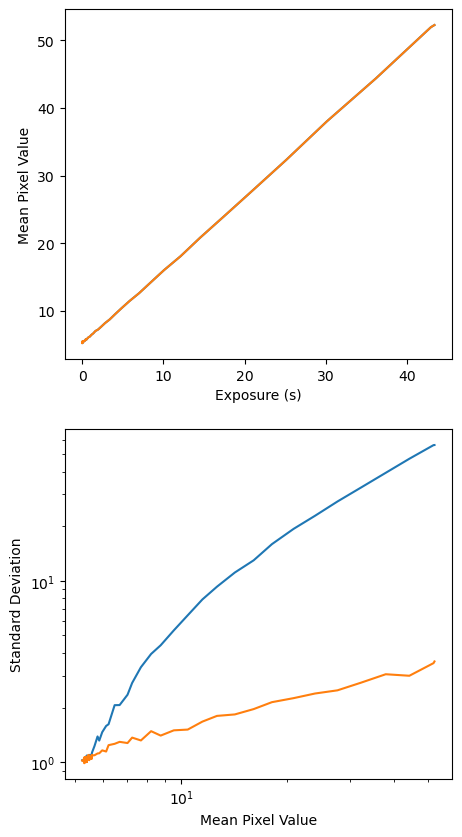

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_040723\1_475\475_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_040723\1_475\475_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_040723\1_475\475_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\dark_040723\1_475\475_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

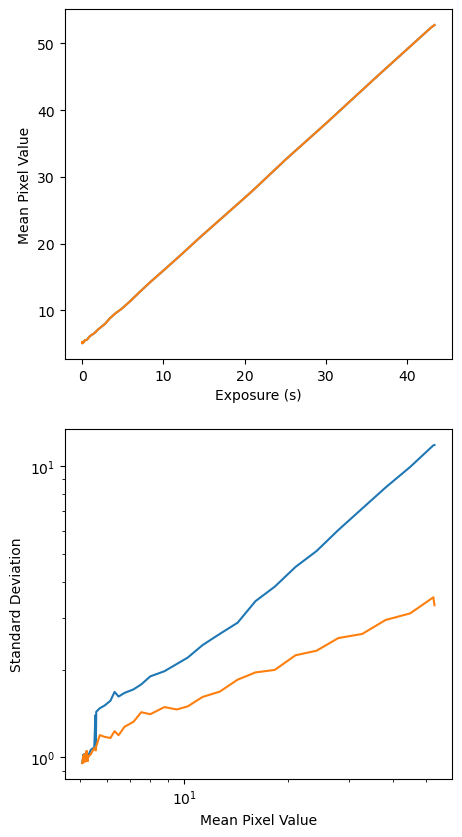

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_040723\2_400\400_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_040723\2_400\400_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_040723\2_400\400_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\dark_040723\2_400\400_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

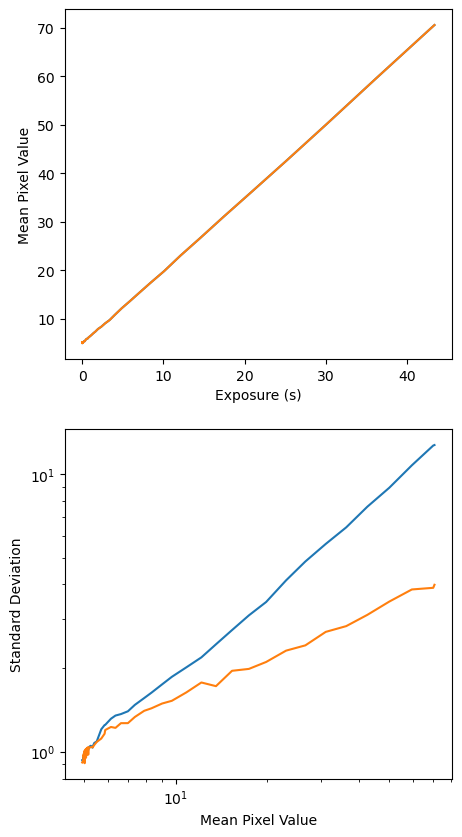

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_040723\3_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_040723\3_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_040723\3_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\dark_040723\3_550\550_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

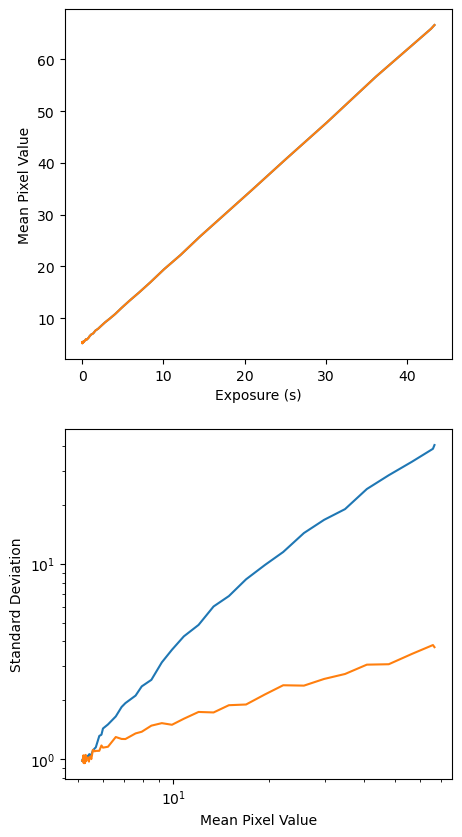

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_040723\4_725\725_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_040723\4_725\725_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_040723\4_725\725_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\dark_040723\4_725\725_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

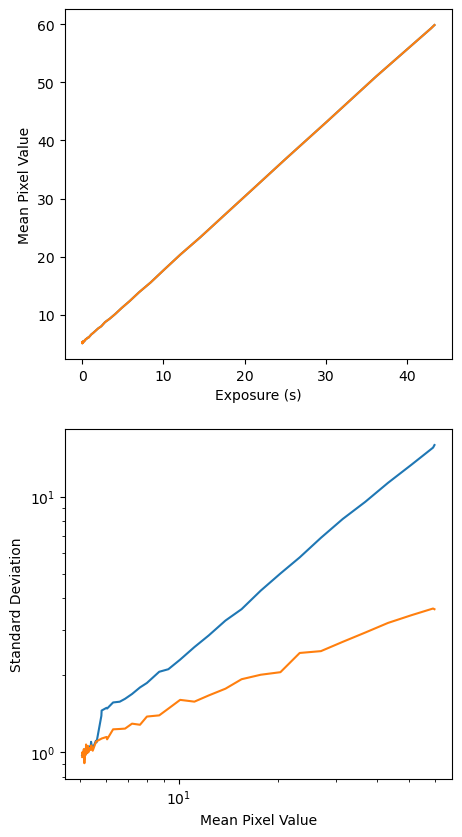

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_040723\5_950\950_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_040723\5_950\950_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_040723\5_950\950_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\dark_040723\5_950\950_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

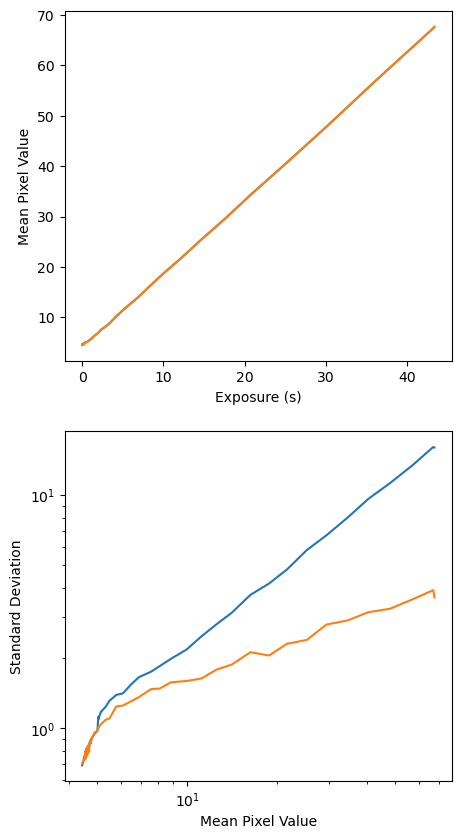

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_040723\7_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_040723\7_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_040723\7_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\dark_040723\7_550\550_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

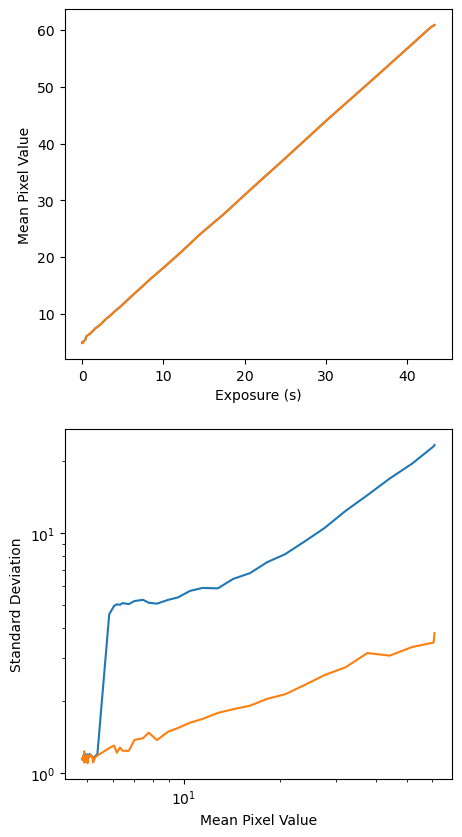

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_040723\6_650\650_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_040723\6_650\650_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_040723\6_650\650_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\dark_040723\6_650\650_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

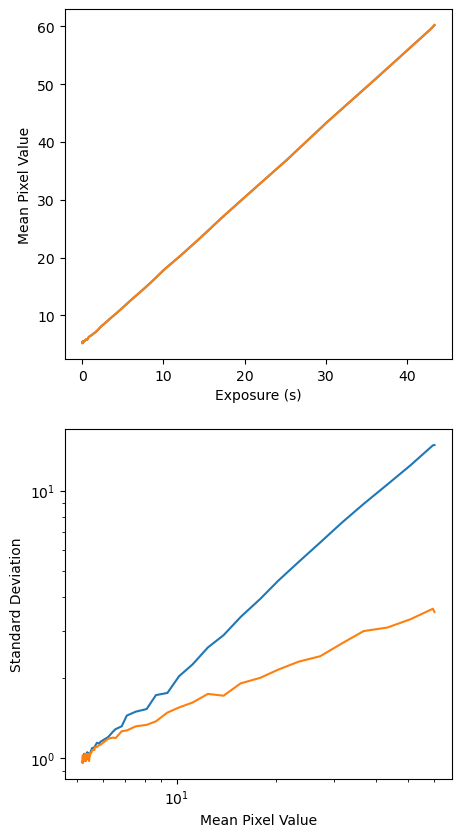

In [13]:
for camera in cameras:
    dark_exposures = camera_calibration_sequence(camera, 'dark_040723')

# Dark Frame Capture

Output:
- addition of dark mean frames to SCT99 directory
- addition of dark mean frames to SCT5 directory

In [11]:
for camera in cameras:
    exposures = sct99_exposures[camera]
    for exposure in exposures:
        camera.set_property('Exposure', 'Value', exposure, 'AbsoluteValue')
        drk = camera.image_capture(roi=True)
        for i in range(24):
            drk += camera.image_capture(roi=True)
        drk_ave = drk.astype(np.float32)/25
        name = f'{exposure*1E6:.0f}us_d'
        camera.save_image(name, 'SCT99_040723', 'drk', drk_ave)

Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging wi

In [12]:
for camera in cameras:
    exposures = sct5_exposures[camera]
    for exposure in exposures:
        camera.set_property('Exposure', 'Value', exposure, 'AbsoluteValue')
        drk = camera.image_capture(roi=True)
        for i in range(24):
            drk += camera.image_capture(roi=True)
        drk_ave = drk.astype(np.float32)/25
        name = f'{exposure*1E6:.0f}us_d'
        camera.save_image(name, 'SCT5_040723', 'drk', drk_ave)

Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging wi